In [140]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [141]:
import pandas as pd
import numpy as np
import sklearn

Visualizing data, Clustering and All, Linear Regression

In [142]:
url = "https://raw.githubusercontent.com/astone04/CAP4770/main/data/cleaned_data.csv"
df = pd.read_csv(url)

Given a data frame regarding movie data with each row having the following attributes - budget, revenue, release date(dd/mm/yy), vote_average (0.0 - 10.0), and genres, try and visualize and find patterns in the data using numpy, pandas, and scikit learn.

The genres column is a list of dictionaries with each dictionary having the following pattern : {'id': x,'name': y} where x is an integer and y is the genre name associated with that id.

Try to make a model using simple techniques like regression, decision trees, random forest, and/or clustering to predict that given a release date, which genre or mix of genres should the studio produce at that time of the year for better success based on budget revenue and vote average.

In [143]:
df

,budget,genres,revenue,release_date,vote_average,release_month,release_year
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",373554033.0,1995-10-30,7.7,10,1995
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",262797249.0,1995-12-15,6.9,12,1995
2,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",81452156.0,1995-12-22,6.1,12,1995
3,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",187436818.0,1995-12-15,7.7,12,1995
4,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",64350171.0,1995-12-22,5.5,12,1995
...,...,...,...,...,...,...,...
5316,11000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",184770205.0,2017-08-03,7.4,8,2017
5317,12000000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",19000000.0,2007-06-14,6.9,6,2007
5318,750000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",3.0,2014-06-05,6.0,6,2014
5319,800000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1328612.0,2006-11-23,5.8,11,2006


In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import MultiLabelBinarizer

Budget and Revenue Relationship

In [145]:
df['release_date']

0       1995-10-30
1       1995-12-15
2       1995-12-22
3       1995-12-15
4       1995-12-22
           ...    
5316    2017-08-03
5317    2007-06-14
5318    2014-06-05
5319    2006-11-23
5320    2010-09-30
Name: release_date, Length: 5321, dtype: object

In [146]:
# Convert release date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract release month and year as separate columns
df['release_month'] = df['release_date'].dt.month
df['release_year'] = df['release_date'].dt.year

# Drop unnecessary columns
df.drop(['release_date'], axis=1, inplace=True)


In [147]:
df.head()

,budget,genres,revenue,vote_average,release_month,release_year
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",373554033.0,7.7,10,1995
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",262797249.0,6.9,12,1995
2,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",81452156.0,6.1,12,1995
3,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",187436818.0,7.7,12,1995
4,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",64350171.0,5.5,12,1995


In [148]:
import seaborn as sns

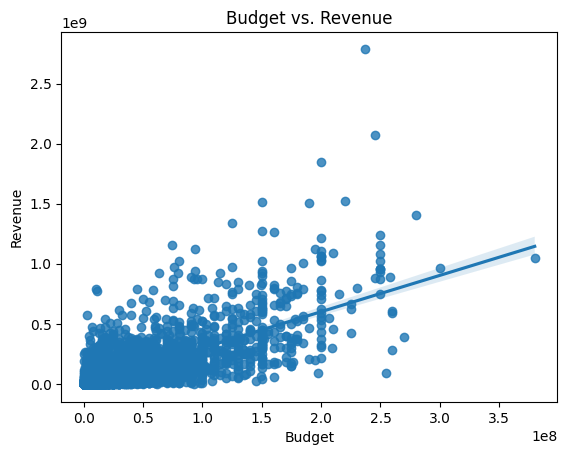

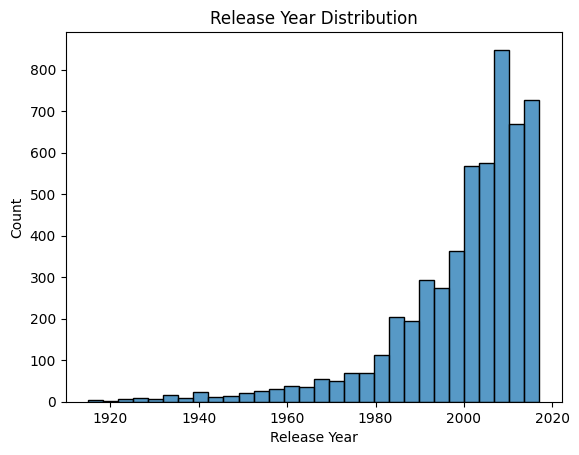

In [149]:
# Scatter plot: Budget vs. Revenue

# # Uncomment below to make the scatter plot larger
# fig = plt.figure(figsize=(38, 24))
sns.regplot(data=df, x='budget', y='revenue')
# # Uncomment below to make scatter plot with transparency applied to data points
# sns.regplot(data=df, x='budget', y='revenue', scatter_kws={'alpha': 0.3})
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget vs. Revenue')
plt.show()


# Histogram: Release Year Distribution
sns.histplot(data=df, x='release_year', bins=30)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Release Year Distribution')
plt.show()



In [150]:
import ast

In [151]:
# Step 2: Extract Genre from List of Dictionaries
df['genres'] = df['genres'].apply(lambda x: [genre['name'] for genre in eval(x)])


In [134]:
df['genres']

0       [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1       [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2       [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
3       [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
4       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
                              ...                        
5316    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
5317    [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...
5318    [{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...
5319    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
5320    [{'id': 10749, 'name': 'Romance'}, {'id': 18, ...
Name: genres, Length: 5321, dtype: object

In [152]:
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(df['genres']), columns=mlb.classes_)
df = pd.concat([df, genres_encoded], axis=1)
df.drop('genres', axis=1, inplace=True)

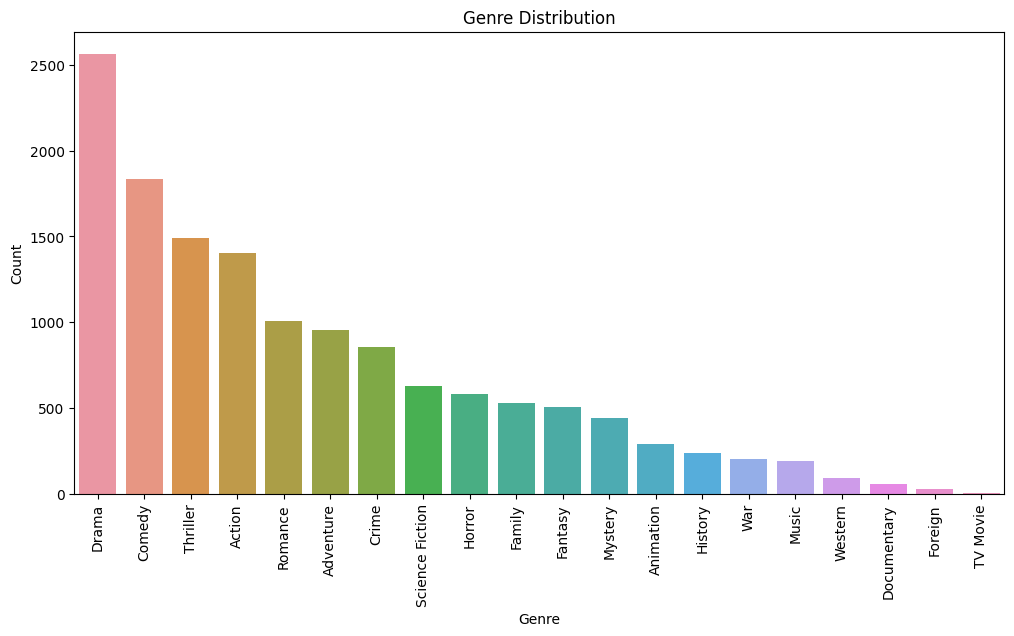

In [153]:
genre_columns = mlb.classes_
genre_counts = df[genre_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.xticks(rotation=90)
plt.show()

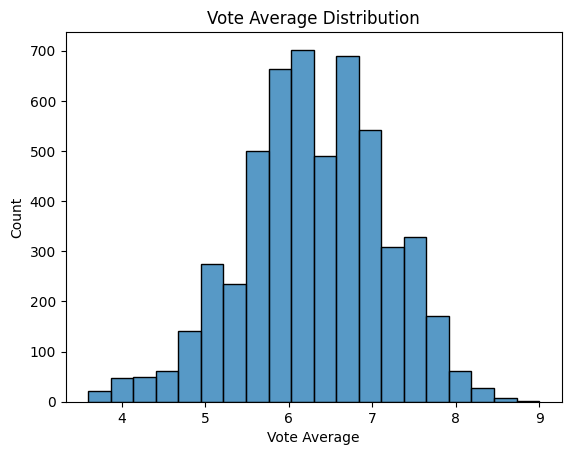

In [154]:
# Vote Average Distribution
sns.histplot(data=df, x='vote_average', bins=20)
plt.xlabel('Vote Average')
plt.ylabel('Count')
plt.title('Vote Average Distribution')
plt.show()

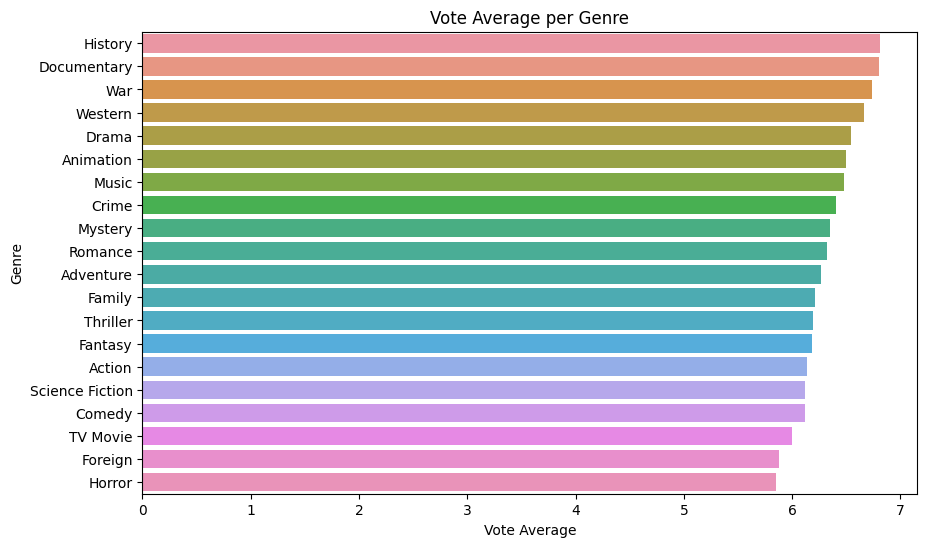

In [155]:
# Vote Average per Genre
genre_columns = mlb.classes_
genre_vote_avg = {}

for genre in genre_columns:
    genre_movies = df[df[genre] == 1]
    genre_vote_avg[genre] = genre_movies['vote_average'].mean()

genre_vote_avg = pd.Series(genre_vote_avg).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_vote_avg.values, y=genre_vote_avg.index)
plt.xlabel('Vote Average')
plt.ylabel('Genre')
plt.title('Vote Average per Genre')
plt.show()

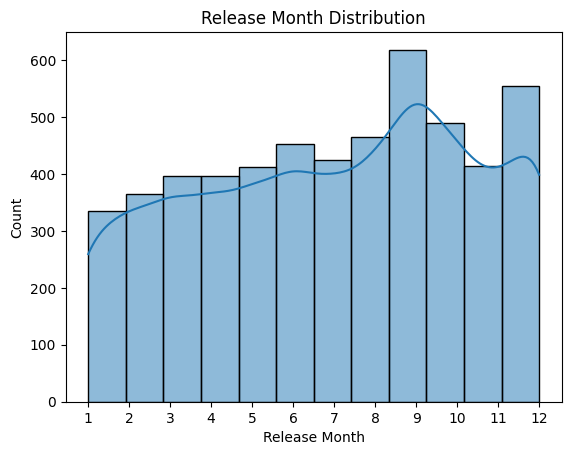

In [156]:
#release mont distribution
sns.histplot(data=df, x='release_month', bins=12, kde=True)
plt.xlabel('Release Month')
plt.ylabel('Count')
plt.title('Release Month Distribution')
plt.xticks(np.arange(1, 13))
plt.show()


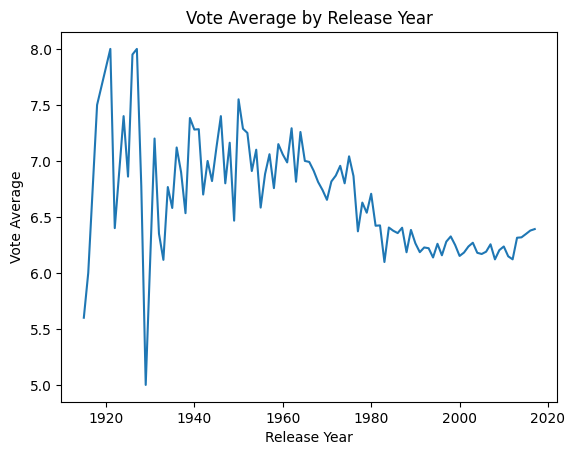

In [157]:
#vote average per year
sns.lineplot(data=df, x='release_year', y='vote_average', errorbar=None)
plt.xlabel('Release Year')
plt.ylabel('Vote Average')
plt.title('Vote Average by Release Year')
plt.show()


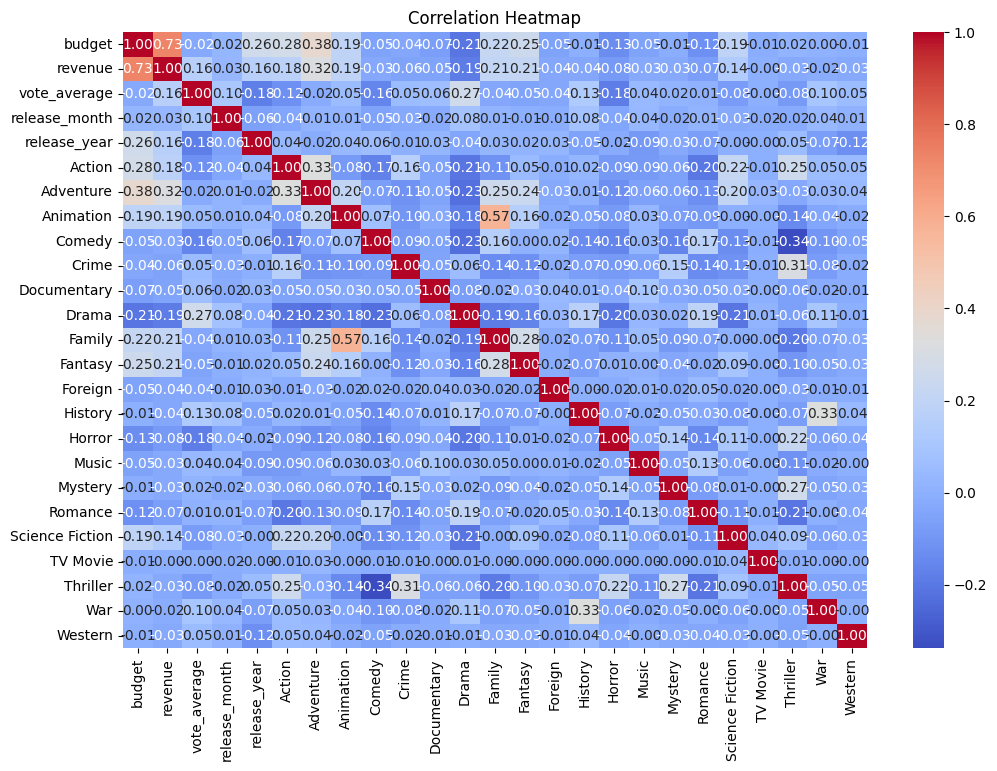

In [158]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


<Figure size 1200x800 with 0 Axes>

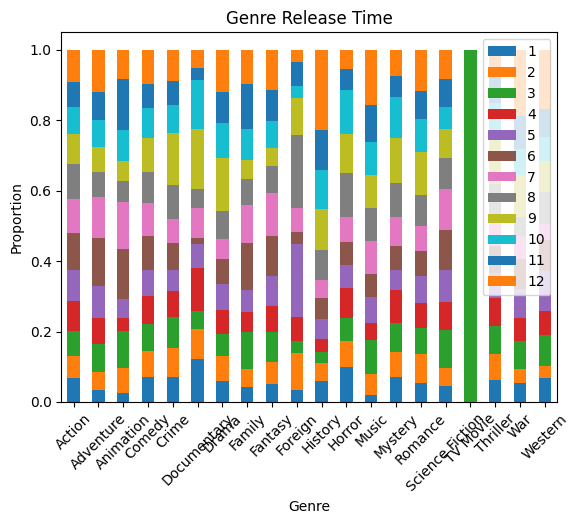

In [159]:
# This plot provides insights into the distribution of movie genres over different months, highlighting the genres that are more popular during specific times of the year. where 1-12 are the months of the year
genre_columns = mlb.classes_
genre_release_counts = df.groupby('release_month')[genre_columns].sum().T
genre_release_counts = genre_release_counts.div(genre_release_counts.sum(axis=1), axis=0)  # Normalize by total count per genre

plt.figure(figsize=(12, 8))
genre_release_counts.plot(kind='bar', stacked=True)
plt.xlabel('Genre')
plt.ylabel('Proportion')
plt.title('Genre Release Time')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

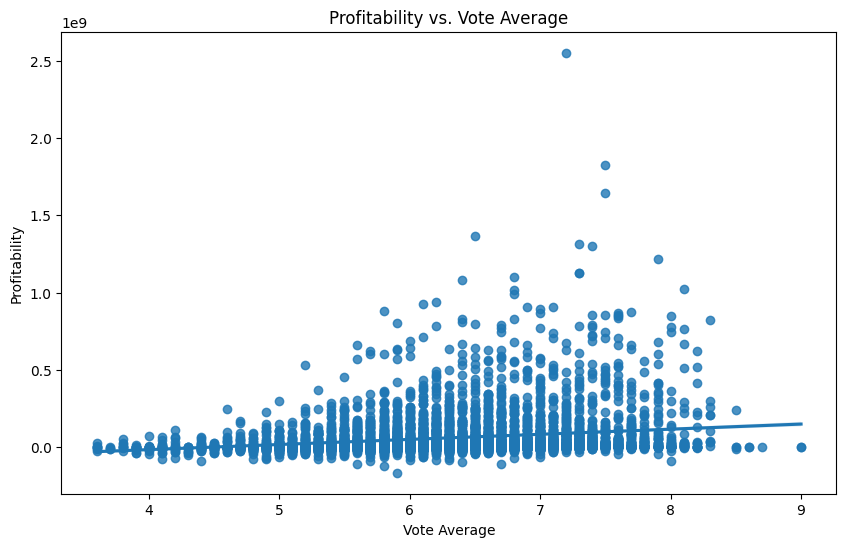

Correlation between Vote Average and Profitability: 0.2021921685475819


In [160]:
df['profitability'] = df['revenue'] - df['budget']


# Step 3: Plot Profitability vs Vote Average
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='vote_average', y='profitability')
plt.xlabel('Vote Average')
plt.ylabel('Profitability')
plt.title('Profitability vs. Vote Average')
plt.show()

# Step 4: Calculate Correlation
correlation = df['vote_average'].corr(df['profitability'])
print('Correlation between Vote Average and Profitability:', correlation)

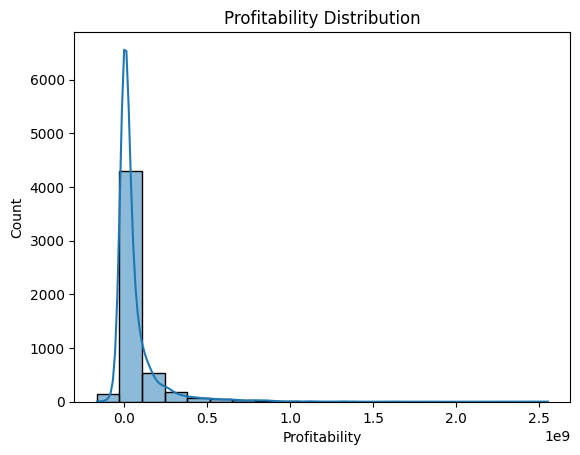

In [161]:
# Profitability Distribution
sns.histplot(data=df, x='profitability', bins=20,kde=True)
plt.xlabel('Profitability')
plt.ylabel('Count')
plt.title('Profitability Distribution')
plt.show()


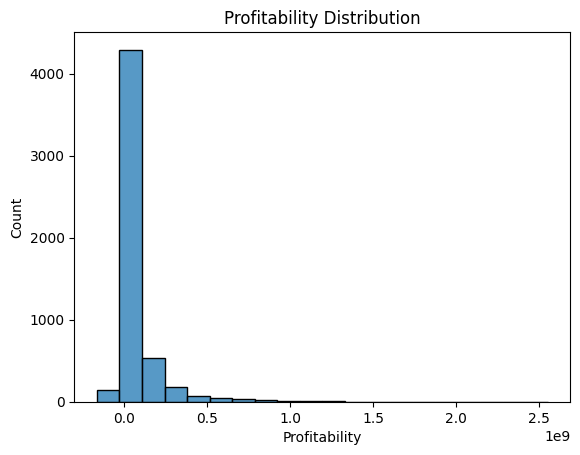

Percentage of Movies in Each Profitability Range:
<0         29.844014
50M+       28.923135
20M-50M    13.869573
0-5M       12.178162
10M-20M     8.795339
5M-10M      6.389776
Name: profitability_range, dtype: float64


In [162]:
sns.histplot(data=df, x='profitability', bins=20)
plt.xlabel('Profitability')
plt.ylabel('Count')
plt.title('Profitability Distribution')
plt.show()

# Step 4: Calculate Ranges and Percentages
profitability_ranges = [-float('inf'), 0, 5000000, 10000000, 20000000, 50000000, float('inf')]
range_labels = ['<0', '0-5M', '5M-10M', '10M-20M', '20M-50M', '50M+']

df['profitability_range'] = pd.cut(df['profitability'], bins=profitability_ranges, labels=range_labels)
percentage_per_range = df['profitability_range'].value_counts(normalize=True) * 100

print('Percentage of Movies in Each Profitability Range:')
print(percentage_per_range)

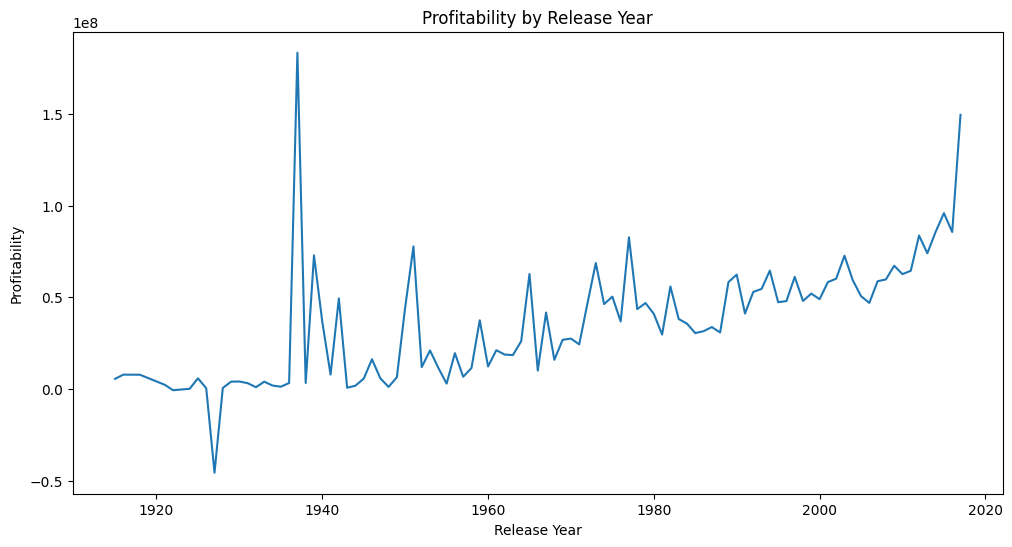

In [163]:
#profitabilty by releae year
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='release_year', y='profitability', errorbar=None)
plt.xlabel('Release Year')
plt.ylabel('Profitability')
plt.title('Profitability by Release Year')
plt.show()


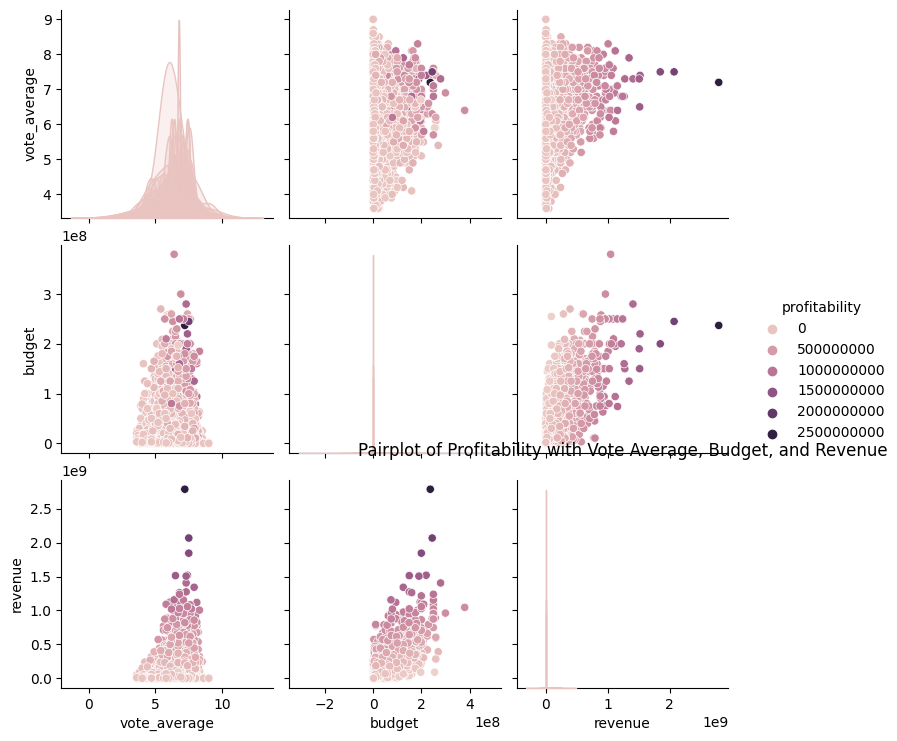

In [164]:
sns.pairplot(data=df, vars=['vote_average', 'budget', 'revenue'], hue='profitability')
plt.title('Pairplot of Profitability with Vote Average, Budget, and Revenue')
plt.show()


In [165]:
df[genre_columns].sum(axis='columns')

0       3
1       3
2       3
3       4
4       3
       ..
5316    4
5317    3
5318    2
5319    2
5320    2
Length: 5321, dtype: int64

In [166]:
df.columns

Index(['budget', 'revenue', 'vote_average', 'release_month', 'release_year',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western', 'profitability', 'profitability_range'],
      dtype='object')

**MODEL**

In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [168]:
len(genre_columns)

20

In [169]:
from sklearn.pipeline import make_pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import StandardScaler
import ast
from sklearn.ensemble import RandomForestClassifier

In [170]:
a=pd.DataFrame({'a':[1,2,3],'b':[1,2,4]})

In [171]:
a

,a,b
0,1,1
1,2,2
2,3,4


In [172]:
a.iloc[0][0]=100

In [117]:
a

,a,b
0,100,1
1,2,2
2,3,4


In [190]:
# Step 5: Model Building and Evaluation
X = df[['budget', 'release_year', 'release_month']]
y = df[mlb.classes_]
# Convert profitability to binary label: profitable (1) or non-profitable (0)
df['profitable'] = np.where(df['profitability'] >= 0, 1, 0)
y_profitable = df['profitable']
# print(y)

for i in range(len(y_profitable)):
    if(y_profitable[i]==0):
        for j in range(len(y.iloc[i])):
            y.iloc[i][j]=0


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier for Genre Prediction
dt_model = MultiOutputClassifier(DecisionTreeClassifier())
dt_model.fit(X_train, y_train)

# Logistic Regression Classifier for Genre Prediction
logreg_model = make_pipeline(StandardScaler(), MultiOutputClassifier(LogisticRegression()))
logreg_model.fit(X_train, y_train)

rf_model = MultiOutputClassifier(RandomForestClassifier())
rf_model.fit(X_train, y_train)

# Step 6: Predict Genre for New Release Year, Month, and Budget
new_release_year = 2023
new_release_month = 7
new_budget = 50000000

new_data = pd.DataFrame({'budget': [new_budget], 'release_year': [new_release_year], 'release_month': [new_release_month]})

# Predict Genre using Decision Tree Classifier
dt_genre_probabilities = dt_model.predict_proba(new_data)
dt_predicted_genre = mlb.classes_[np.argmax(dt_genre_probabilities[0])]

# Predict Genre using Logistic Regression Classifier
logreg_genre_probabilities = logreg_model.predict_proba(new_data)
logreg_predicted_genre = mlb.classes_[np.argmax(logreg_genre_probabilities[0])]

# Check if the Predicted Genre is Profitable
predicted_profitable = df[df['profitable'] == True][dt_predicted_genre].sum() > 0

# # Calculate Accuracy and F1 Score
#dt_predictions = dt_model.predict(X_test)
#logreg_predictions = logreg_model.predict(X_test)
#rf_predictions = rf_model.predict(X_test)
#dt_accuracy = accuracy_score(y_test, dt_predictions)
#logreg_accuracy = accuracy_score(y_test, logreg_predictions)

#dt_f1_score = f1_score(y_test, dt_predictions, average='weighted')
#logreg_f1_score = f1_score(y_test, logreg_predictions, average='weighted')
#rf_f1_score=f1_score(y_test,rf_predictions,average='weighted')
#print('Decision Tree Classifier - Accuracy:', dt_accuracy)
#print('Decision Tree Classifier - F1 Score:', dt_f1_score)

#print('Logistic Regression Classifier - Accuracy:', logreg_accuracy)
#print('Logistic Regression Classifier - F1 Score:', logreg_f1_score)

#print('Random Forest Regression Classifier - F1 Score:', rf_f1_score)

print('Predicted Genre (Decision Tree Classifier):', dt_predicted_genre)
print('Predicted Genre (Logistic Regression Classifier):', logreg_predicted_genre)
print('Predicted Profitable:', predicted_profitable)

Predicted Genre (Decision Tree Classifier): Adventure
Predicted Genre (Logistic Regression Classifier): Action
Predicted Profitable: True


In [179]:
# Model Building and Evaluation for predicting profit dollar amount

X = df[['budget', 'release_year', 'release_month']]
# Create a new target variable for profit (revenue - budget)
y = df['revenue'] - df['budget']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor for Profit Prediction
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Random Forest Regressor for Profit Prediction
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Step 6: Predict Profit for New Release Year, Month, and Budget
new_release_year = 2023
new_release_month = 7
new_budget = 50000000

new_data = pd.DataFrame({'budget': [new_budget], 'release_year': [new_release_year], 'release_month': [new_release_month]})

# Predict Profit using Decision Tree Regressor
dt_predicted_profit = dt_model.predict(new_data)

# Predict Profit using Random Forest Regressor
rf_predicted_profit = rf_model.predict(new_data)

print('Predicted Profit (Decision Tree Regressor):', dt_predicted_profit[0])
print('Predicted Profit (Random Forest Regressor):', rf_predicted_profit[0])



Predicted Profit (Decision Tree Regressor): -24964050.0
Predicted Profit (Random Forest Regressor): 72028940.248


In [180]:
# Model Building and Evaluation for predicting revenue
X = df[['budget', 'release_year', 'release_month']]
# Changed the target variable to 'revenue' for dollar amount prediction
y = df['revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor for Revenue Prediction
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Random Forest Regressor for Revenue Prediction
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Step 6: Predict Revenue for New Release Year, Month, and Budget
new_release_year = 2023
new_release_month = 7
new_budget = 50000000

new_data = pd.DataFrame({'budget': [new_budget], 'release_year': [new_release_year], 'release_month': [new_release_month]})

# Predict Revenue using Decision Tree Regressor
dt_predicted_revenue = dt_model.predict(new_data)

# Predict Revenue using Random Forest Regressor
rf_predicted_revenue = rf_model.predict(new_data)

print('Predicted Revenue (Decision Tree Regressor):', dt_predicted_revenue[0])
print('Predicted Revenue (Random Forest Regressor):', rf_predicted_revenue[0])



Predicted Revenue (Decision Tree Regressor): 25035950.0
Predicted Revenue (Random Forest Regressor): 102309567.15


In [191]:
dt_predictions

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Accuracy of All Three Models

In [184]:
dt_pred=0
logreg_pred=0
length=0
acc_dt=0
acc_logreg=0
acc_rf=0
rf_pred=0
for i in range(len(y_test)):
    if(df['profitable'][y_test.index[i]]==1):
        length+=1
    for j in range(len(y_test.iloc[i])):
        if(y_test.iloc[i][j]==1 and dt_predictions[i][j]==1):
            dt_pred+=1
            break
    for j in range(len(y_test.iloc[i])):
        if(y_test.iloc[i][j]==1 and logreg_predictions[i][j]==1):
            logreg_pred+=1
            break
    for j in range(len(y_test.iloc[i])):
        if(y_test.iloc[i][j]==1 and rf_predictions[i][j]==1):
            rf_pred+=1
            break
acc_dt=dt_pred/length
acc_logreg=logreg_pred/length
acc_rf=rf_pred/length
print('Decision Tree Classifier - Accuracy:', acc_dt)
print('Logistic Regression Classifier - Accuracy:', acc_logreg)
print('Random Forest Classifier - Accuracy:', acc_rf)

Decision Tree Classifier - Accuracy: 0.4422043010752688
Logistic Regression Classifier - Accuracy: 0.07123655913978495
Random Forest Classifier - Accuracy: 0.2970430107526882


We are just checking for whether the genre is profitable. If there is a certain profit target, then we can alternatively modify the model in the future so as to see whether that forecasted range of profit can be achieved or not.